<a href="https://colab.research.google.com/github/mahmoudhaney/TrafficSignRecognition/blob/main/TrafficSignModel/TrafficSign_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Dependencies**

In [ ]:
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from skimage.io import imread
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from skimage.color import rgb2gray, rgba2rgb
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
import pandas as pd
import numpy as np
import datetime
import time
import random
import os
import cv2

%reload_ext tensorboard


# **Preparing & Preprocessing Images**

In [ ]:
dataset_dir = './data/'

folderMap = {
    0: '20 km/h', 1: '30 km/h', 2: '50 km/h', 3: '60 km/h', 4: '70 km/h', 5: '80 km/h', 6:'80 km/h end', 7: '100 km/h', 8: '120 km/h', 
    9: 'No overtaking', 10: 'No overtaking for tracks', 11: 'Crossroad with secondary way', 12: 'Main road', 13: 'Give way', 14: 'Stop', 
    15: 'Road up', 16: 'Road up for track', 17: 'Brock', 18: 'Other dangerous', 19: 'Turn left', 20: 'Turn right', 21: 'Winding road', 
    22: 'Hollow road', 23: 'Slippery road', 24: 'Narrowing road', 25: 'Roadwork', 26: 'Traffic light', 27: 'Pedestrian', 28: 'Children', 
    29: 'Bike', 30: 'Snow', 31: 'Deer', 32: 'End of the limits', 33: 'Only right', 34: 'Only left', 35: 'Only straight', 36: 'Only straight and right', 
    37: 'Only straight and left', 38: 'Take right', 39: 'Take left', 40: 'Circle crossroad', 41: 'End of overtaking limit', 42: 'End of overtaking limit for track'
}


In [ ]:
Meta = os.path.join(dataset_dir, 'Meta')
Train = os.path.join(dataset_dir, 'Train')

In [ ]:
num_classes = len(os.listdir(Train))
num_classes

43

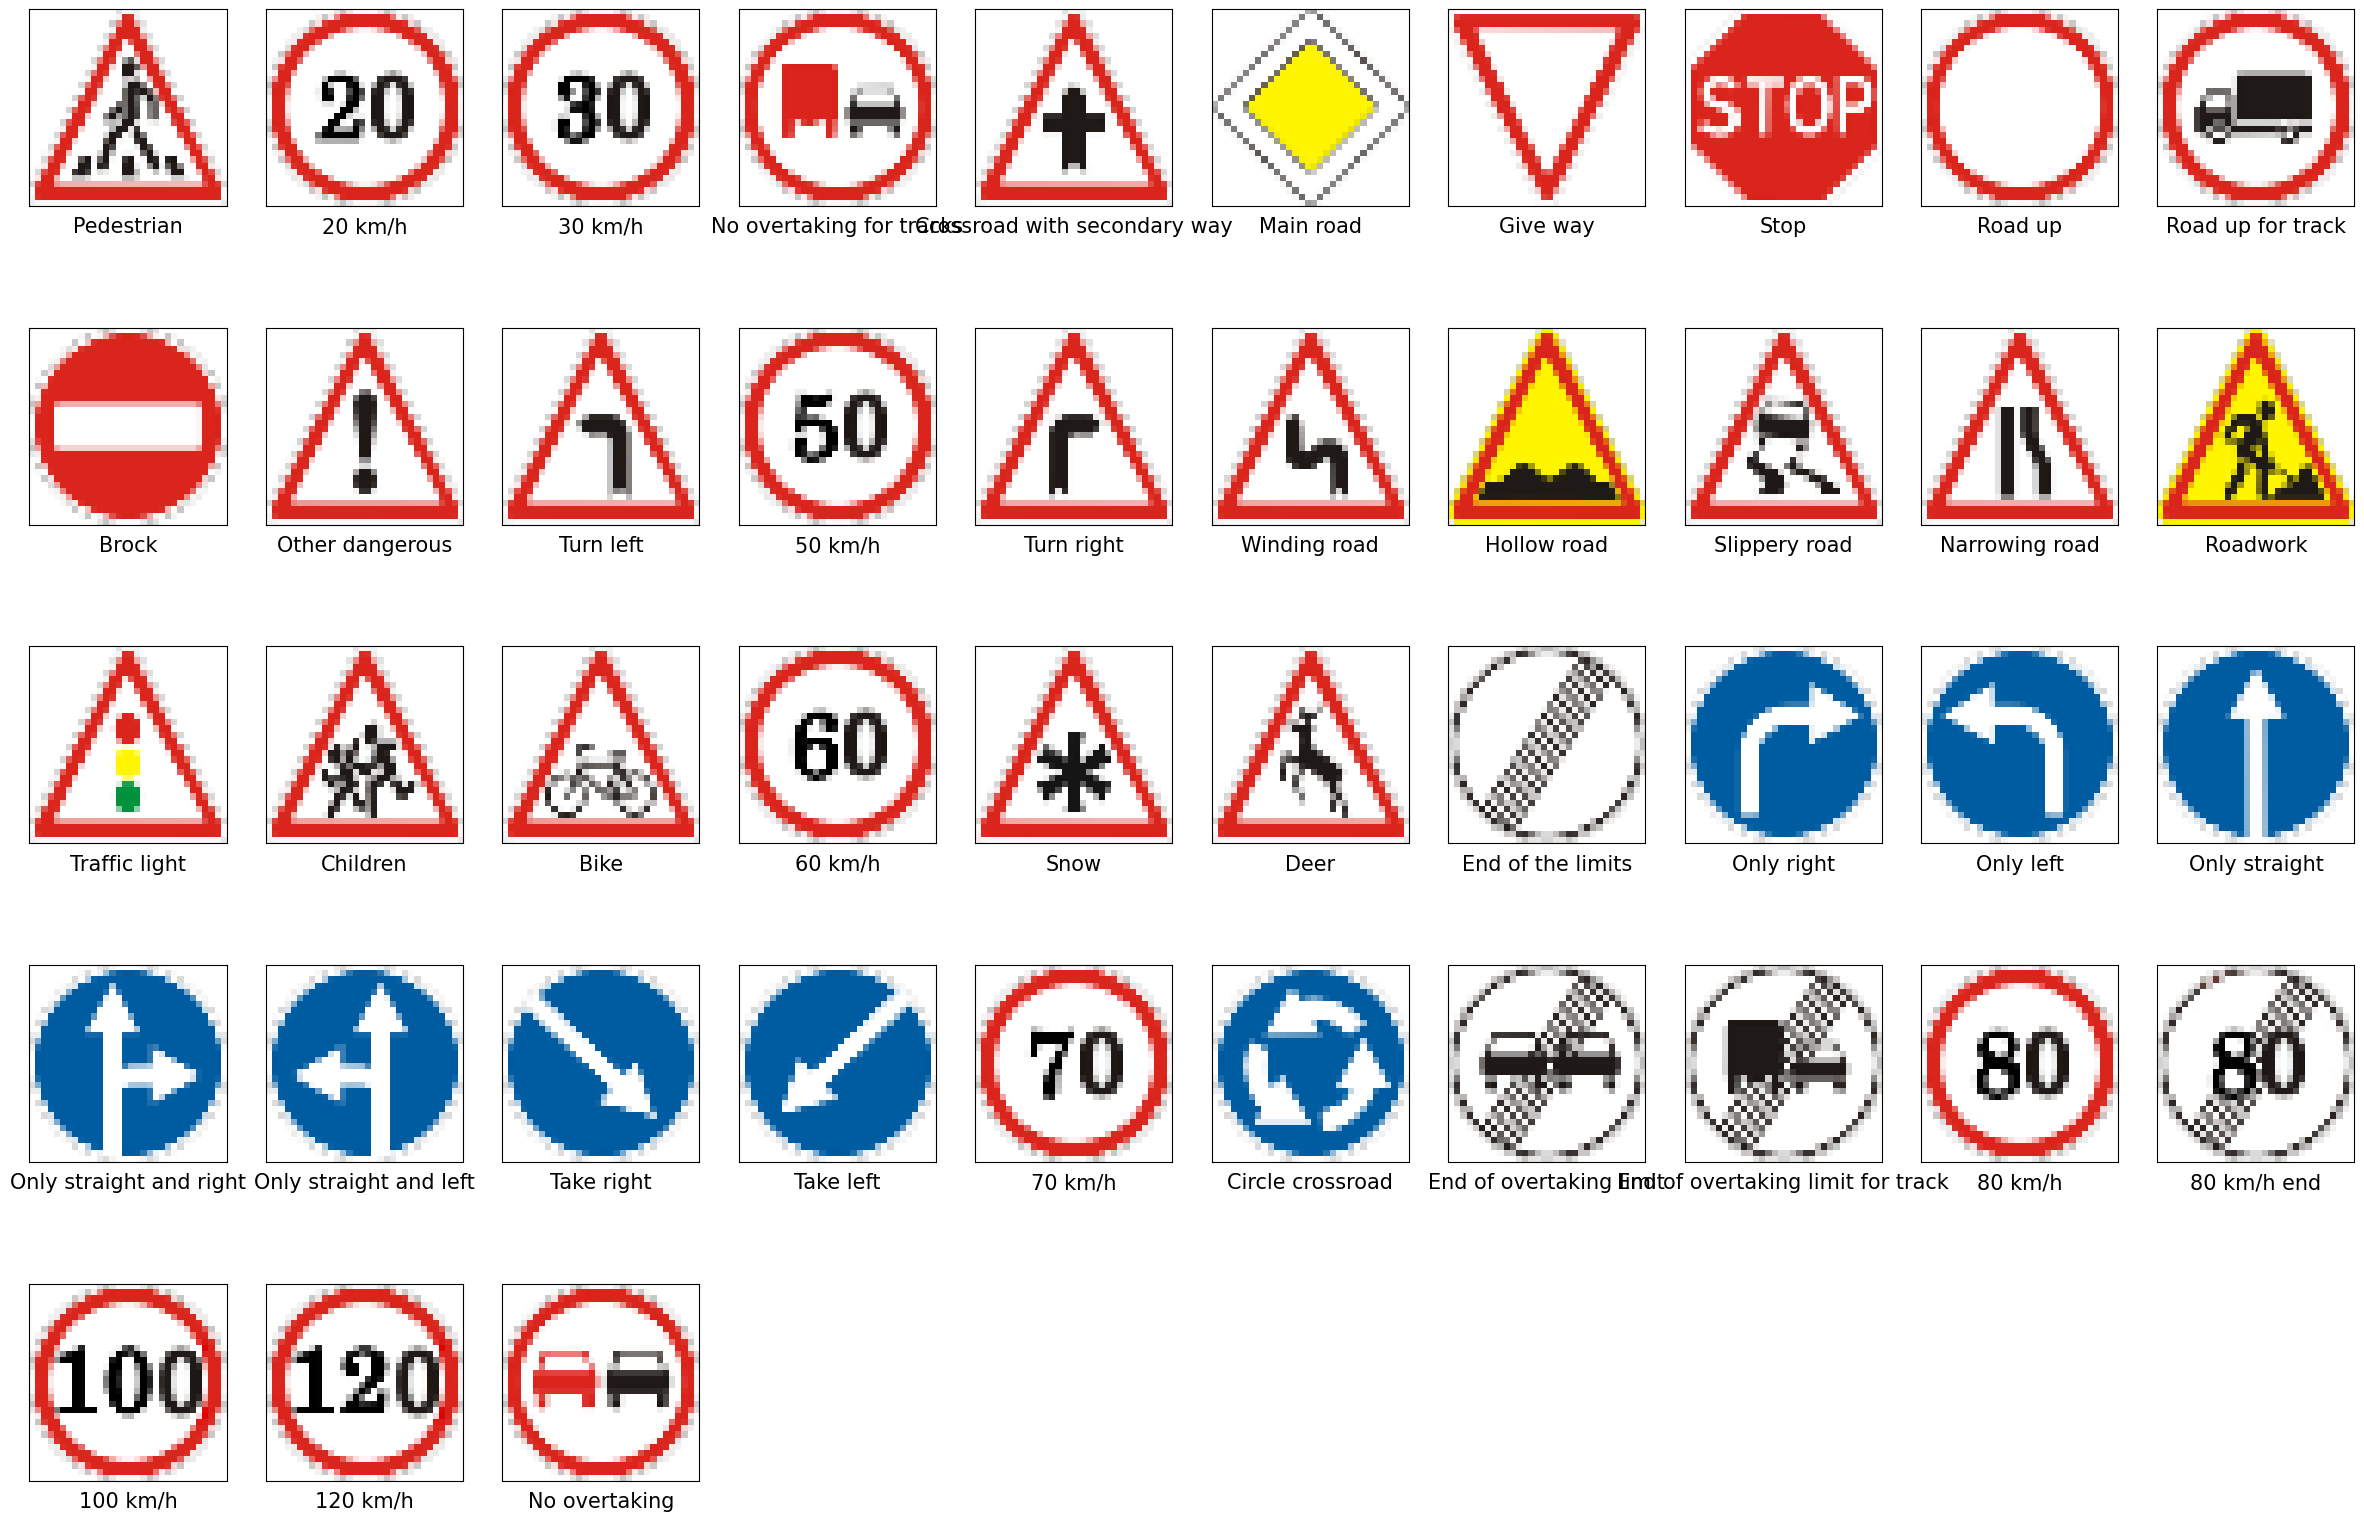

In [ ]:
df = pd.read_csv(os.path.join(dataset_dir, 'Meta.csv'))
df = df.sort_values(by=['ClassId'])

meta_images = []
meta_labels = []

for i in range(df.shape[0]):
    label = df.ClassId[i]
    image_path_meta = df.Path[i]
    image_path = os.path.join(dataset_dir, image_path_meta)
    image = plt.imread(image_path)
    image = cv2.resize(image, (32, 32))
    meta_images.append(image)
    meta_labels.append(folderMap[int(label)])

fig = plt.figure(figsize=(30, 20))
for i in range(len(meta_images)):
    ax = fig.add_subplot(5, 10, i+1)
    plt.axis()
    plt.xticks([])
    plt.yticks([])
    ax.set_xlabel(xlabel = meta_labels[i], fontsize=15)
    ax.imshow(meta_images[i])

In [ ]:
images = []
labels = []
labels_idx = []

for label in os.listdir(Train):
    images_for_label = os.path.join(Train, label)
    for image in os.listdir(images_for_label):
        image = plt.imread(os.path.join(images_for_label, image))
        image = cv2.resize(image, (32, 32))
        images.append(image)
        labels.append(folderMap[int(label)])
        labels_idx.append(label)


In [ ]:
images = np.array(images)
labels = np.array(labels)
labels_idx = np.array(labels_idx, dtype='int32')

images.shape


(39209, 32, 32, 3)

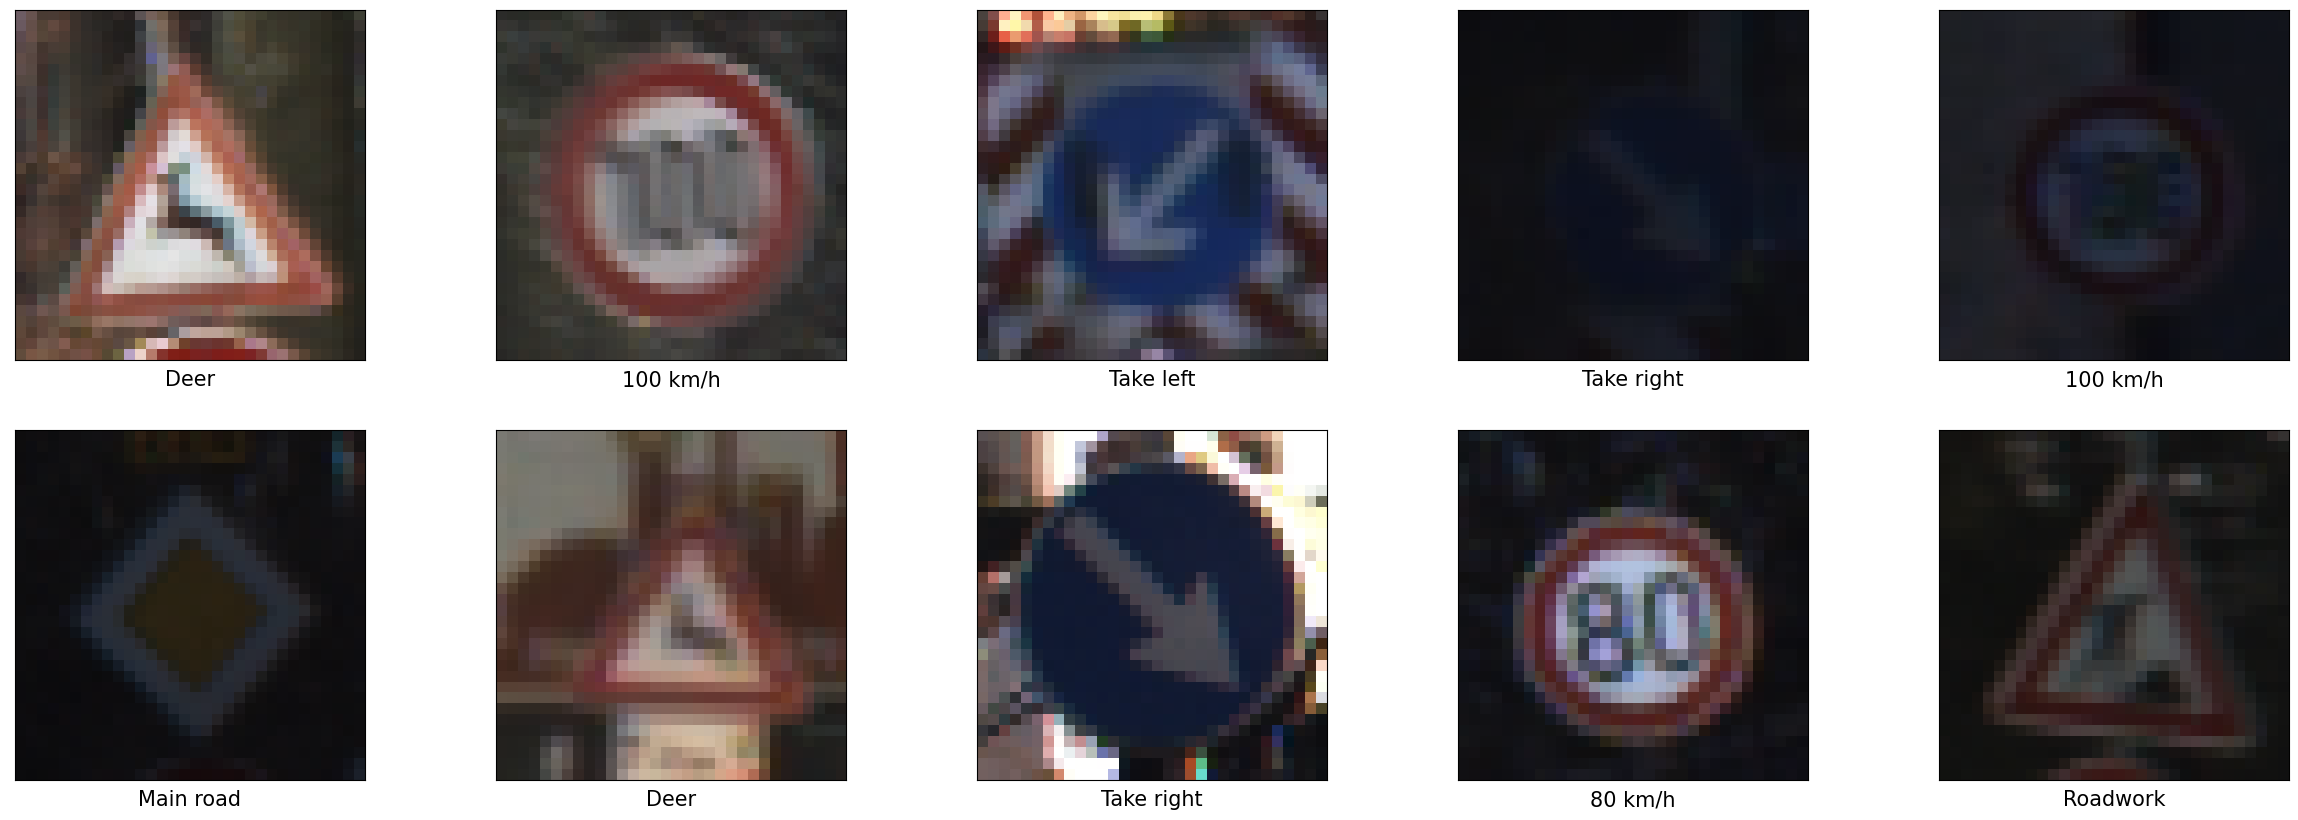

In [ ]:
fig = plt.figure(figsize=(30, 10))
for i in range(10):
    random_num = np.random.randint(0, 39209)
    ax = fig.add_subplot(2, 5, i+1)
    plt.axis()
    plt.xticks([])
    plt.yticks([])
    ax.set_xlabel(xlabel = labels[random_num], fontsize=15)
    ax.imshow(images[random_num])

# **Splitting Sataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_idx, random_state=1, stratify=labels_idx, shuffle=True,test_size=0.3)

In [ ]:
print("Training: ", len(X_train))
print("Test: ", len(X_test))

Training:  27446
Test:  11763


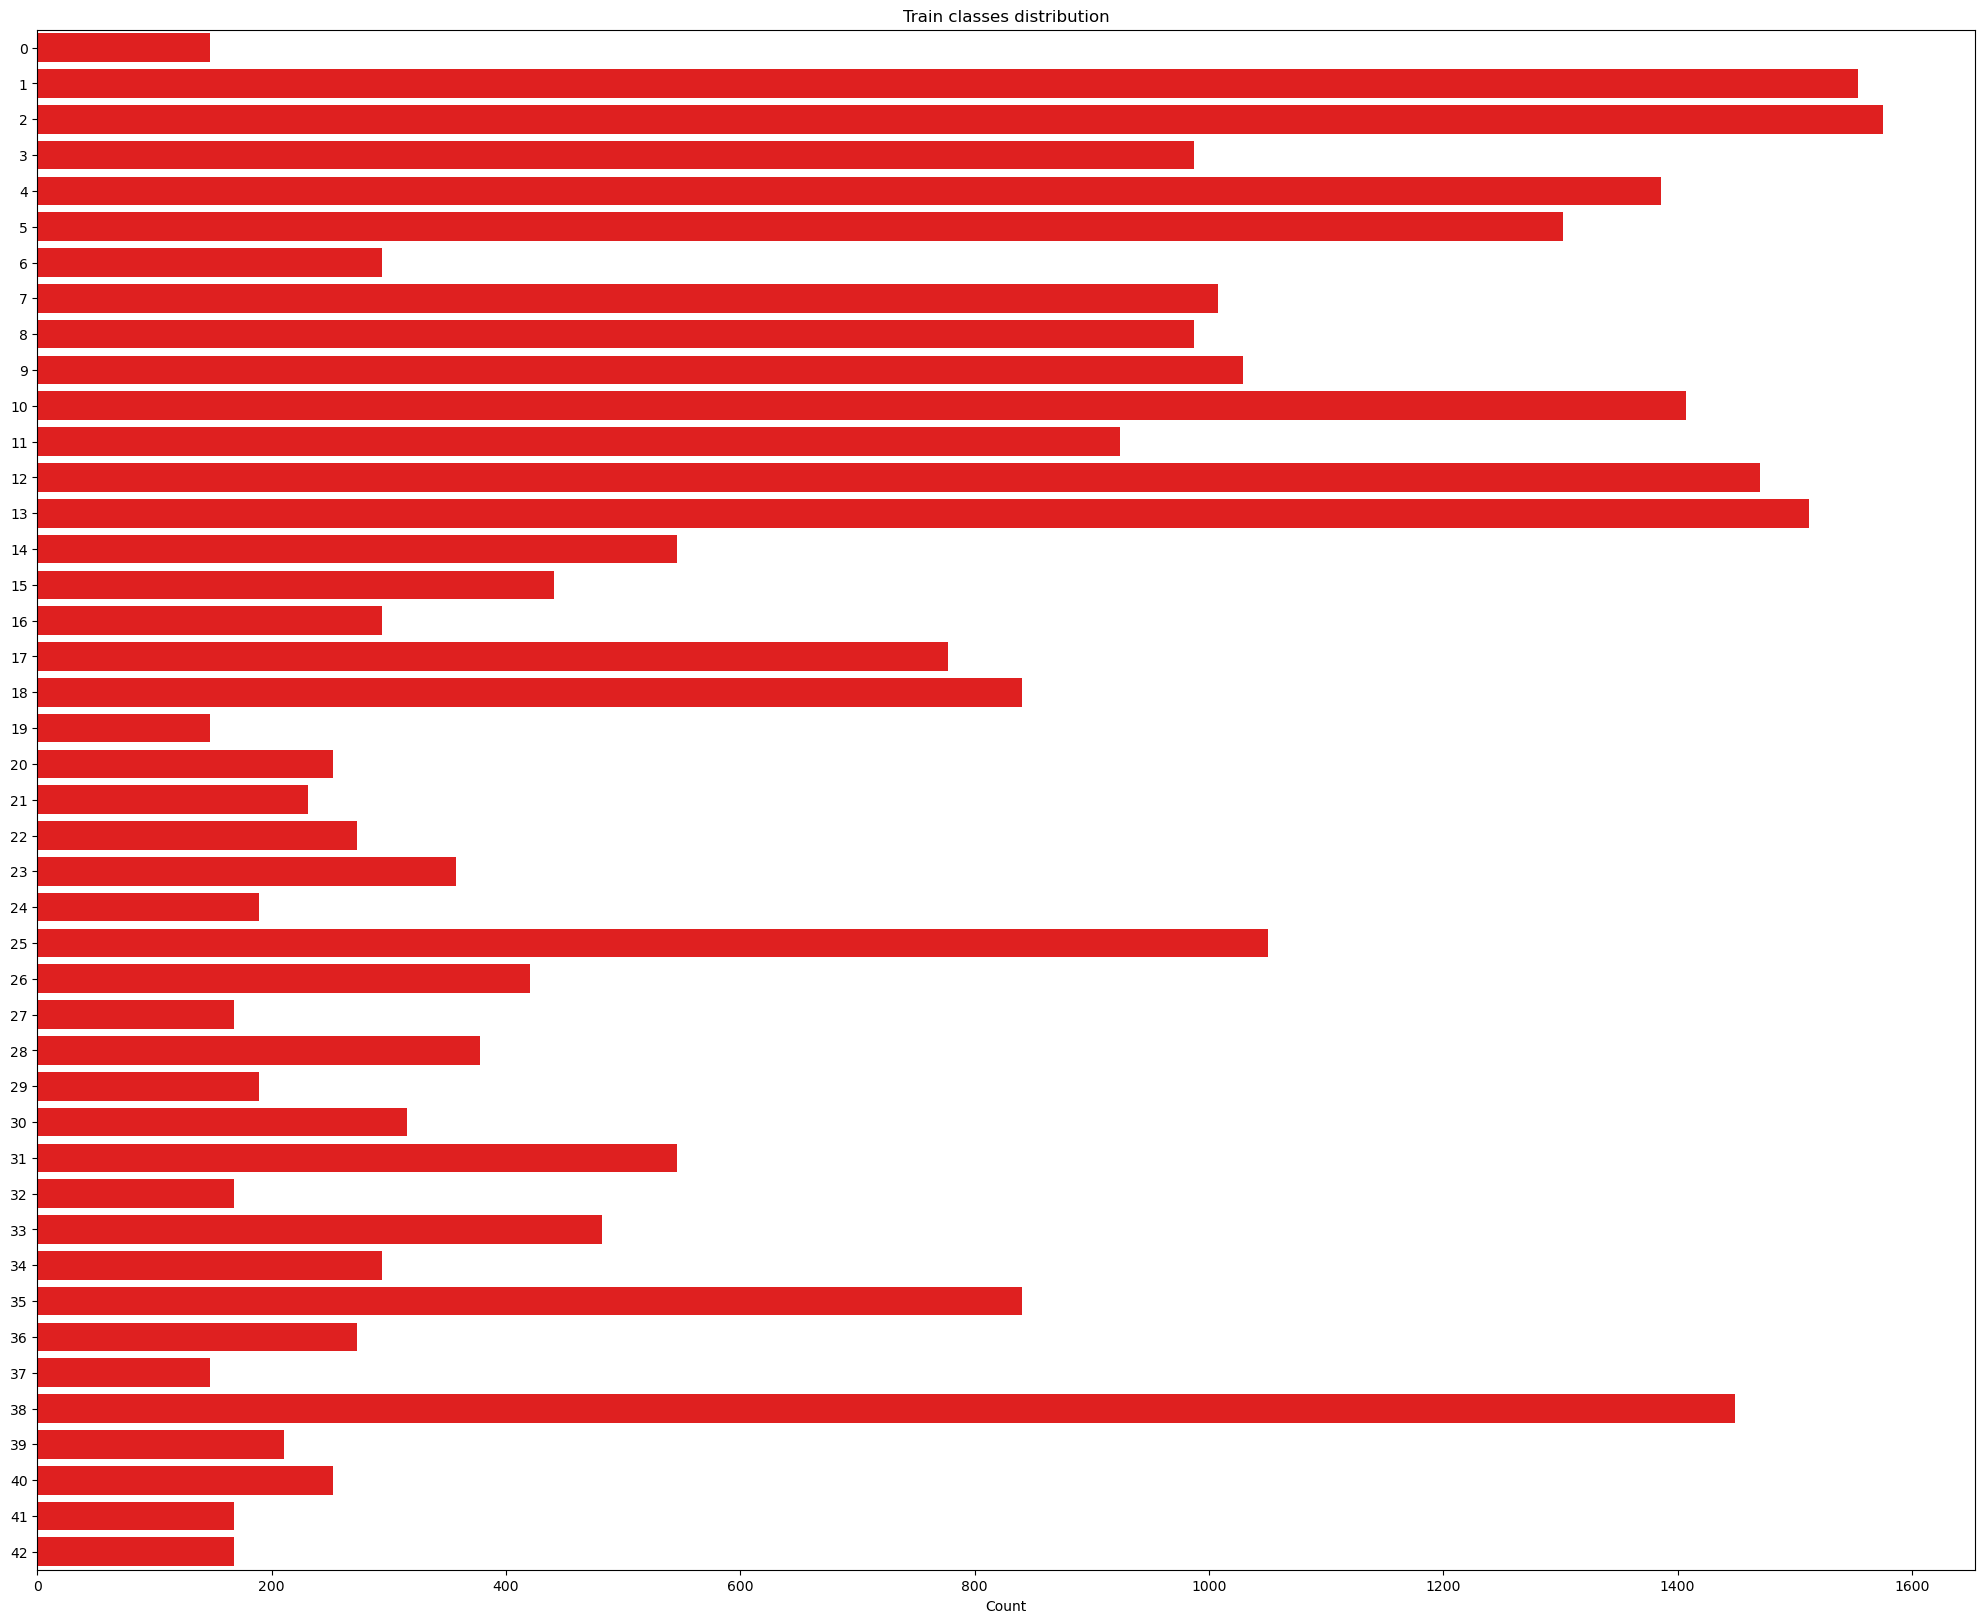

In [ ]:
plt.figure(figsize=(25, 20))
plt.title('Train classes distribution')

sns.countplot(y=y_train, color="red")
plt.xlabel('Count')
plt.show()


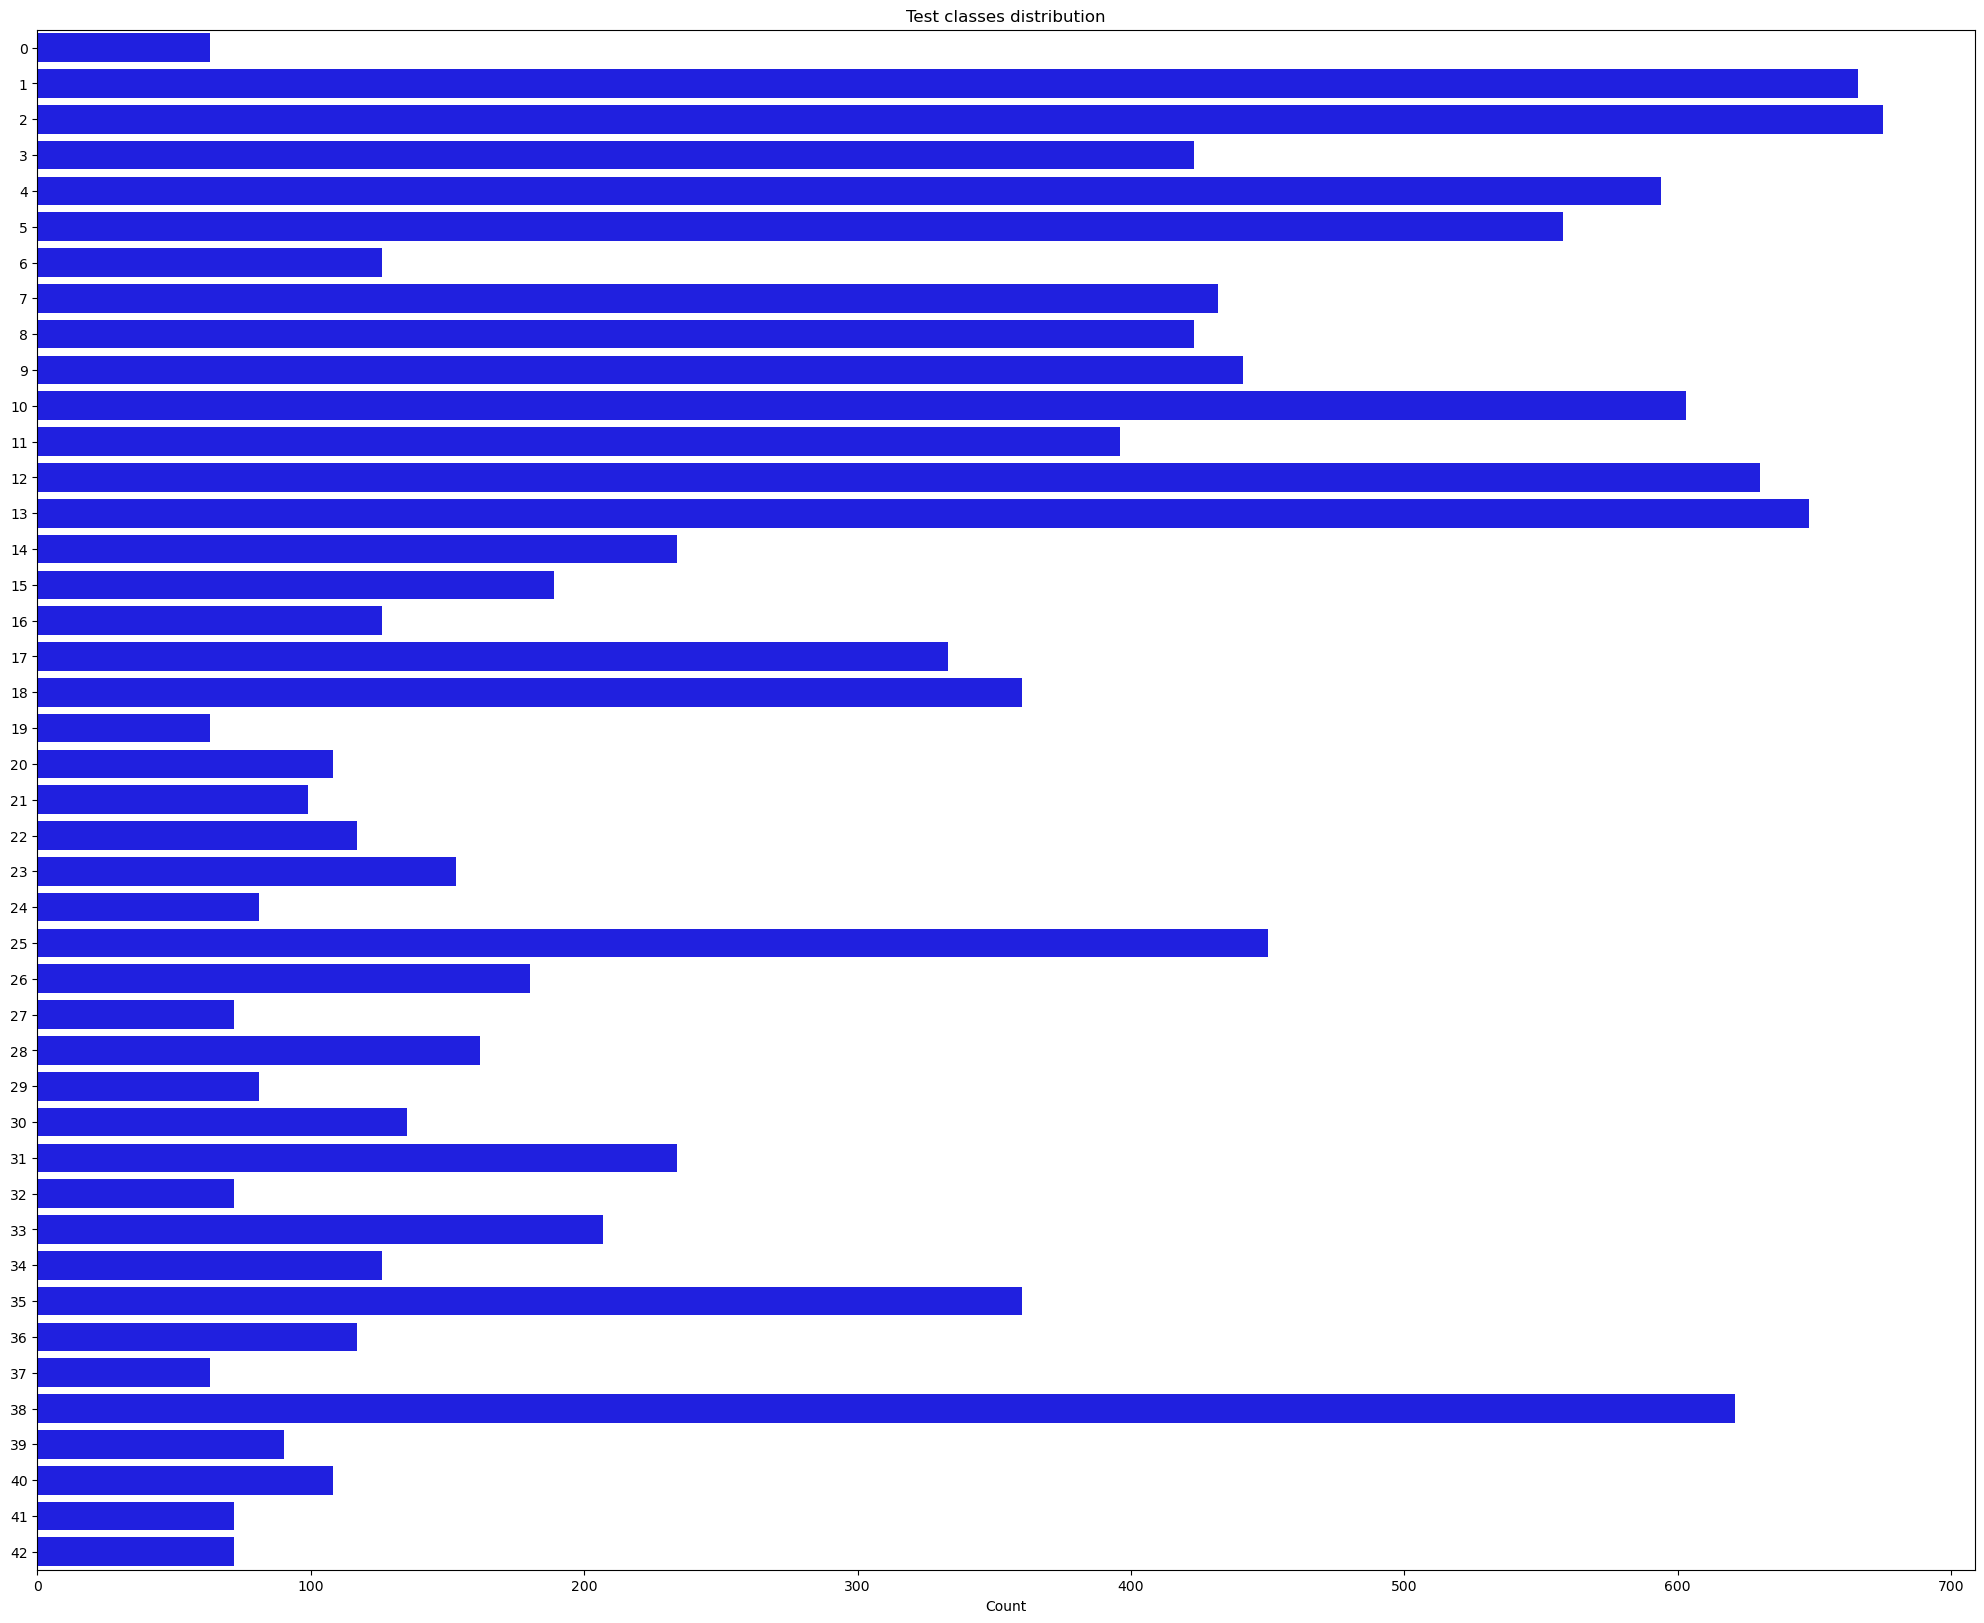

In [ ]:
plt.figure(figsize=(25, 20))
plt.title('Test classes distribution')

sns.countplot(y=y_test, color="blue")
plt.xlabel('Count')
plt.show()


# **Building the model**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(43)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 43)                2795      
                                                                 
Total params: 408,555
Trainable params: 408,555
Non-trainable params: 0
_________________________________________________________________


In [ ]:

history = model.fit(
    x=X_train, 
    y=y_train, 
    epochs=30,
    validation_data=(X_test, y_test),
)

Epoch 1/30
858/858 [==============================] - 5s 5ms/step - loss: 2.2910 - accuracy: 0.3974 - val_loss: 1.4090 - val_accuracy: 0.6036
Epoch 2/30
858/858 [==============================] - 3s 4ms/step - loss: 1.0671 - accuracy: 0.7043 - val_loss: 0.9577 - val_accuracy: 0.7273
Epoch 3/30
858/858 [==============================] - 4s 4ms/step - loss: 0.7124 - accuracy: 0.8031 - val_loss: 0.6066 - val_accuracy: 0.8280
Epoch 4/30
858/858 [==============================] - 3s 4ms/step - loss: 0.5442 - accuracy: 0.8467 - val_loss: 0.5061 - val_accuracy: 0.8575
Epoch 5/30
858/858 [==============================] - 3s 4ms/step - loss: 0.4458 - accuracy: 0.8760 - val_loss: 0.3934 - val_accuracy: 0.8981
Epoch 6/30
858/858 [==============================] - 3s 4ms/step - loss: 0.4087 - accuracy: 0.8839 - val_loss: 0.3747 - val_accuracy: 0.8986
Epoch 7/30
858/858 [==============================] - 3s 4ms/step - loss: 0.3639 - accuracy: 0.8958 - val_loss: 0.3434 - val_accuracy: 0.9103
Epoch 

# **Model Evaluation**

### Model Accuracy

In [ ]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)

train_acc_default = train_acc

print('\nTrain accuracy:', round(train_acc*100, 2), "%")


858/858 - 28s - loss: 0.1130 - accuracy: 0.9656 - 28s/epoch - 32ms/step

Train accuracy: 96.56 %


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

test_acc_default = test_acc

print('\nTest accuracy:', round(test_acc*100, 2), "%")

368/368 - 11s - loss: 0.2067 - accuracy: 0.9436 - 11s/epoch - 31ms/step

Test accuracy: 94.36 %


### **Confusion Matrix**

In [ ]:
pred = model.predict(X_test)

368/368 [==============================] - 10s 28ms/step


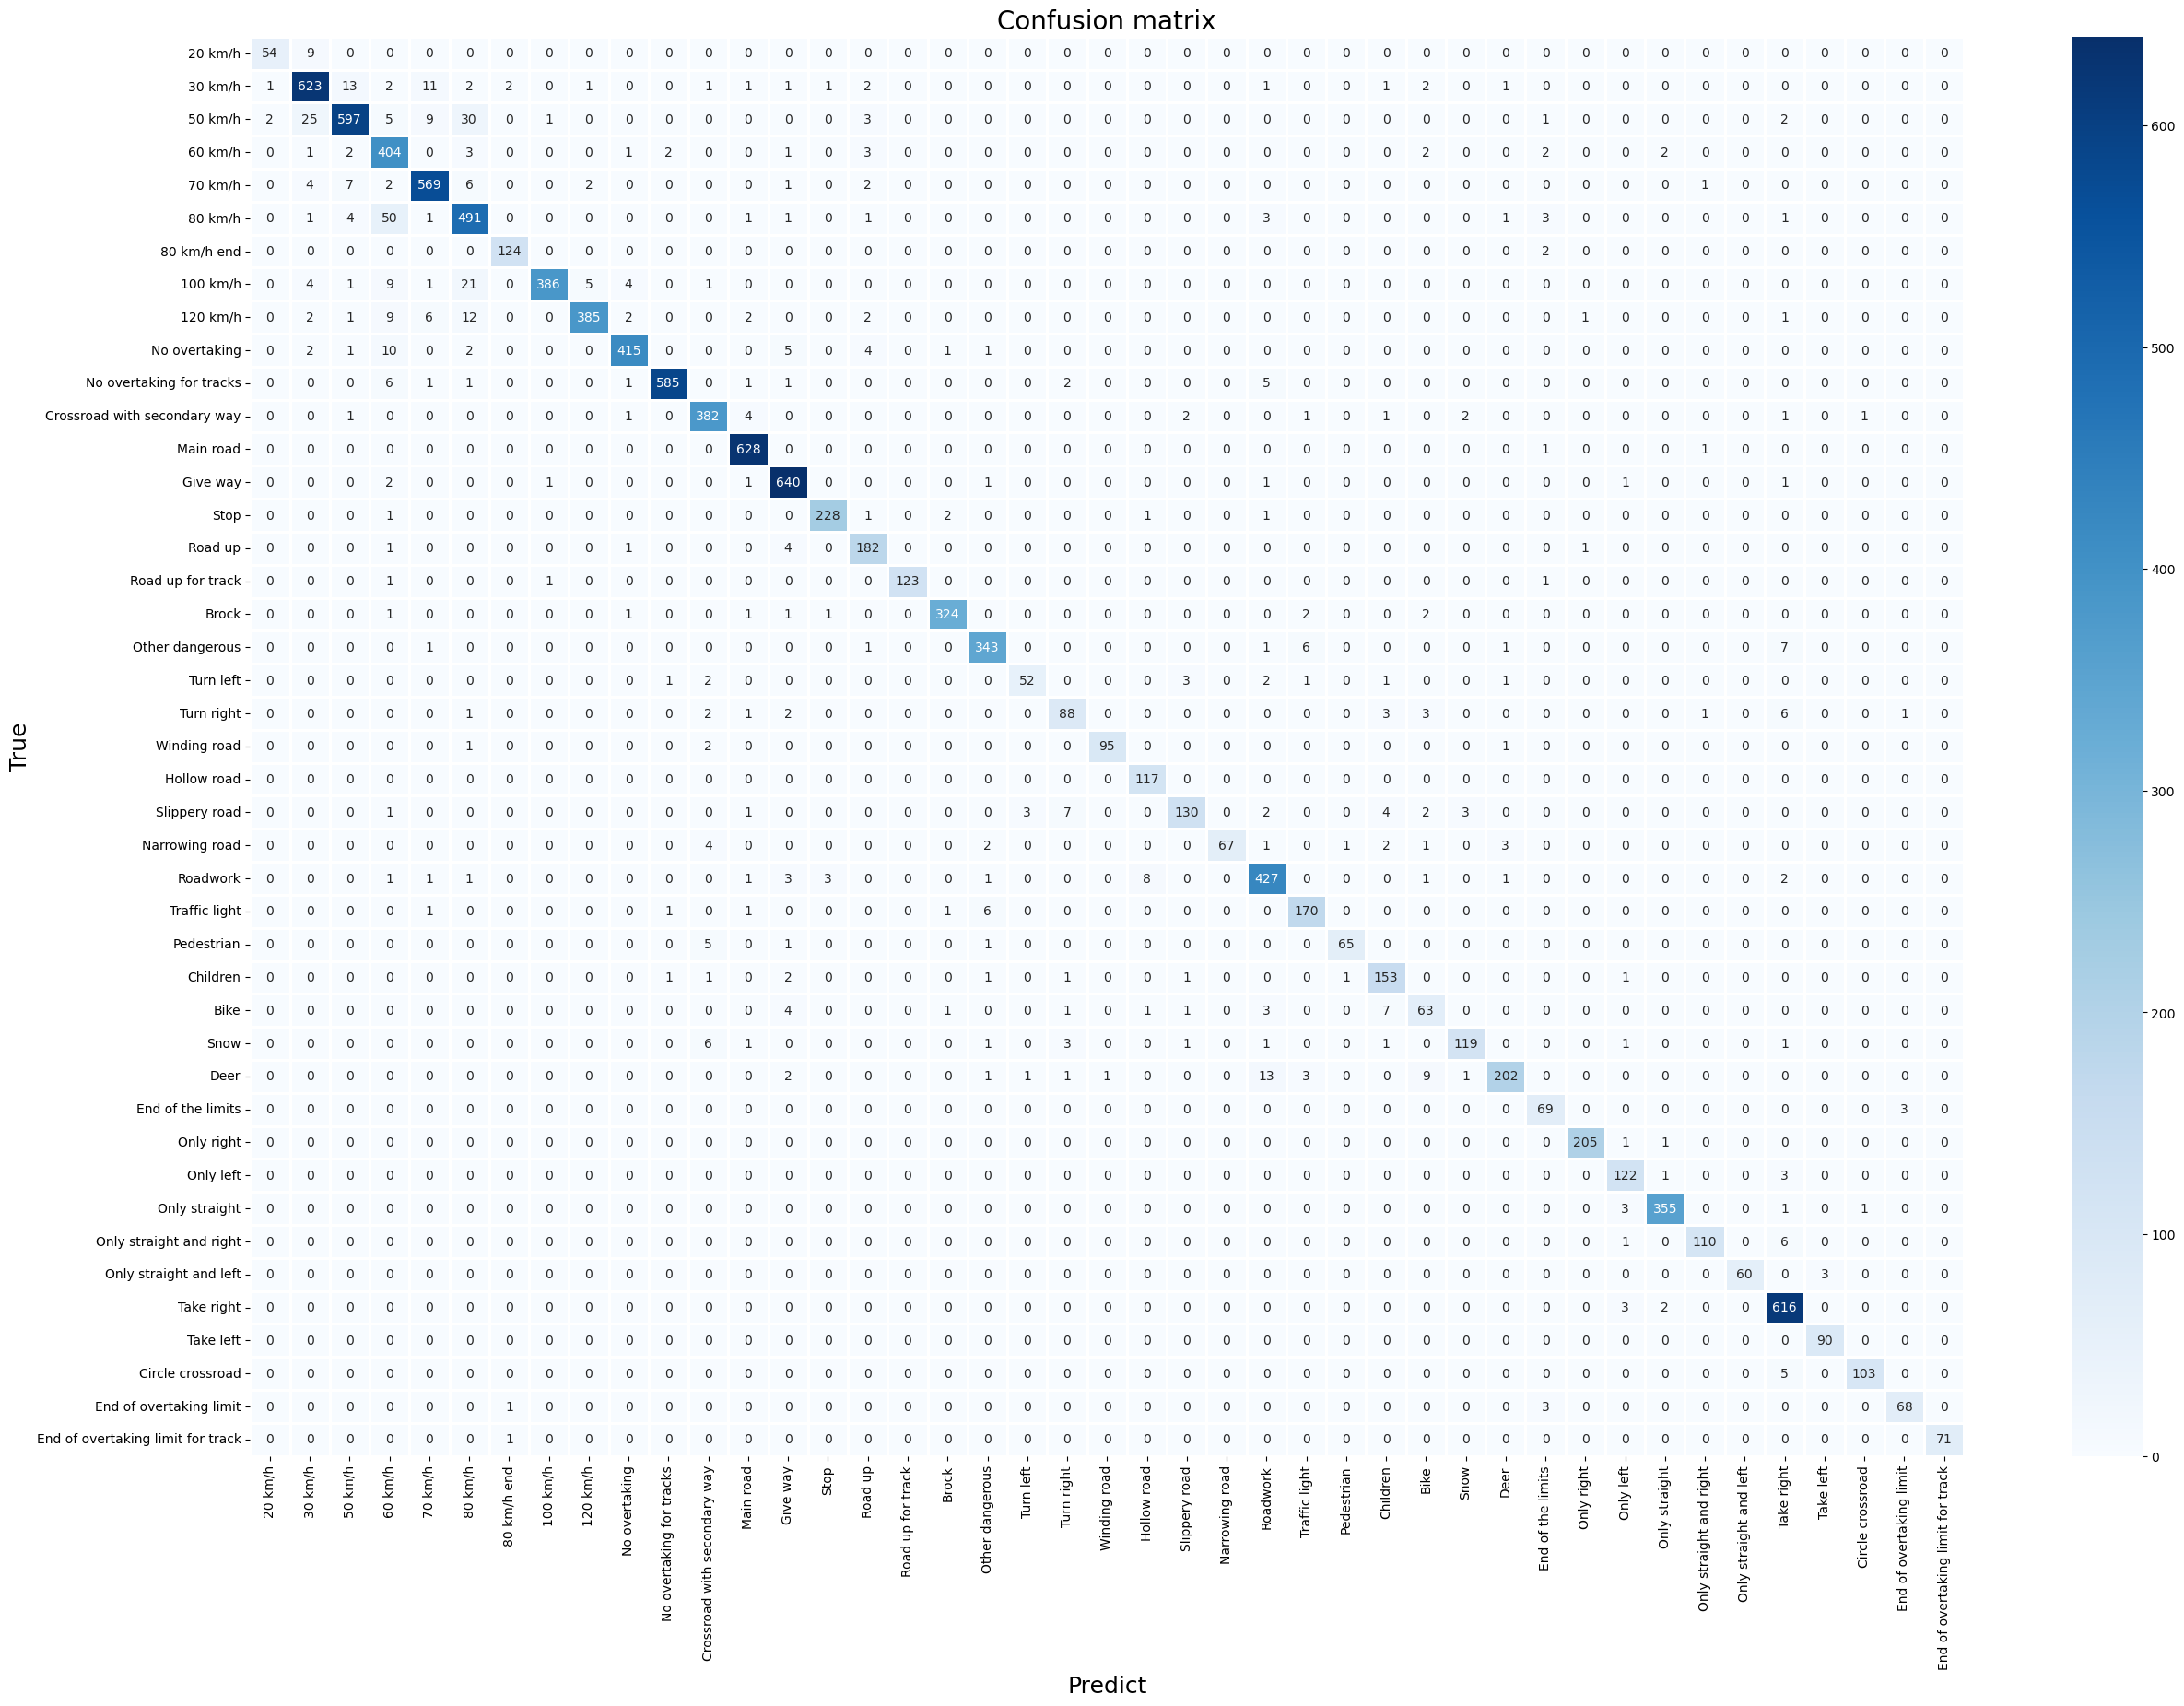

In [ ]:
def highest_pred(matrix):
    return np.where(matrix == max(matrix))[0][0]
model_pred = list(map(highest_pred, pred))
confusion = confusion_matrix(y_test, model_pred)

plt.figure(figsize=(30,20))
sns.heatmap(confusion, 
            annot=True, 
            linewidths=1, 
            cmap='Blues', 
            fmt='g', 
            xticklabels=folderMap.values(), 
            yticklabels=folderMap.values())
plt.title("Confusion matrix", size=20)
plt.xlabel("Predict", size=18)
plt.ylabel("True", size=18)
plt.show()

### Accuracy Curve

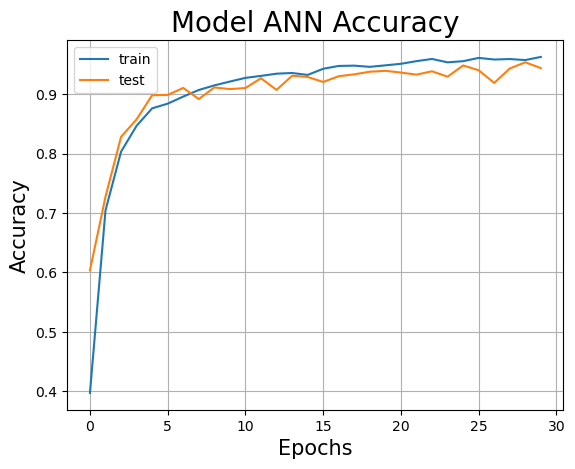

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model ANN Accuracy', fontsize=20)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.grid()
plt.legend()



### Loss Curve

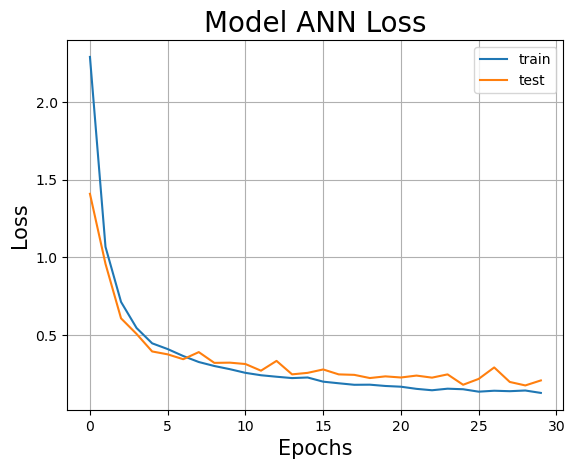

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model ANN Loss', fontsize=20)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.grid()
plt.legend()

plt.show()

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)

368/368 [==============================] - 10s 27ms/step


# **Some Test Cases**

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(folderMap[predicted_label],
                                100*np.max(predictions_array),
                                folderMap[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(43))
  plt.yticks([])
  thisplot = plt.bar(range(43), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



In [ ]:
num_rows = 50
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(8*2*num_cols, 4*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i],  y_test)
plt.tight_layout()
plt.show()
